<a href="https://colab.research.google.com/github/DEVELOPER-DEEVEN/face-tracker/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/heart.csv.xls")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

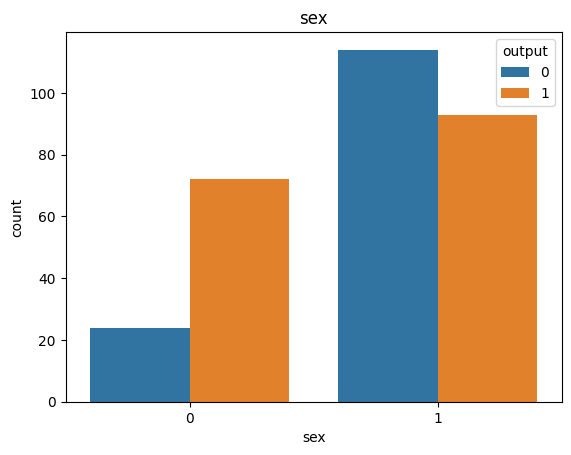

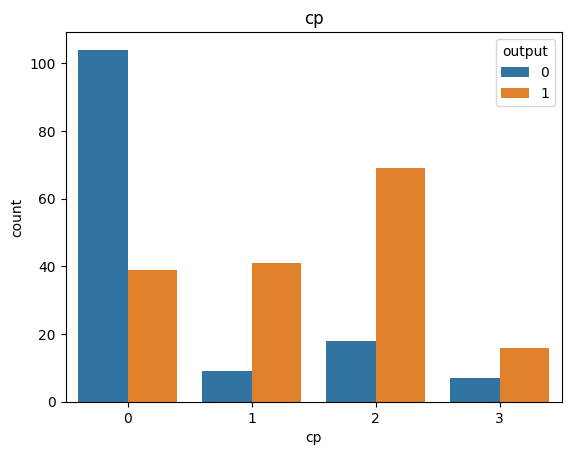

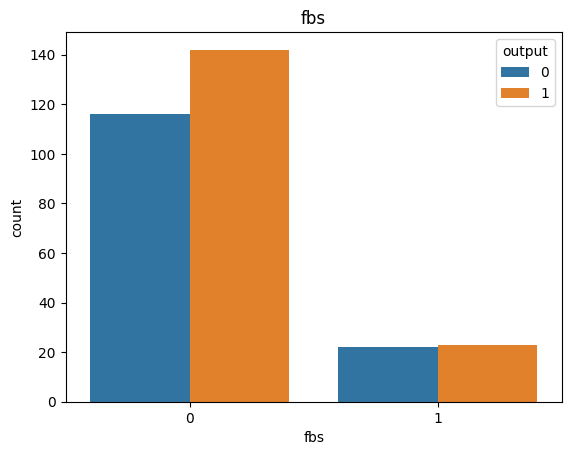

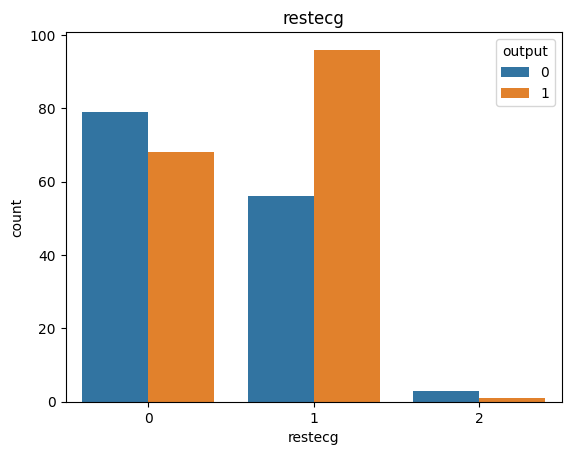

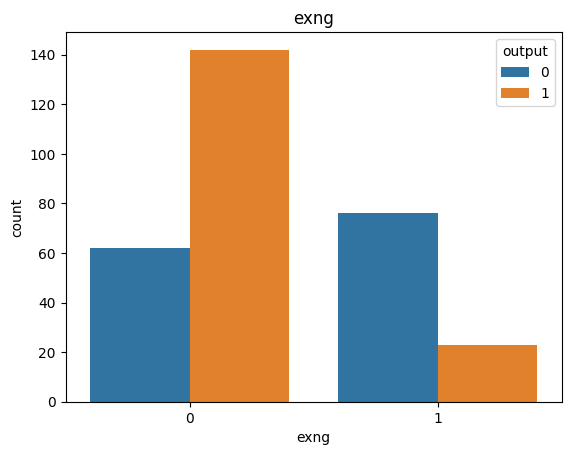

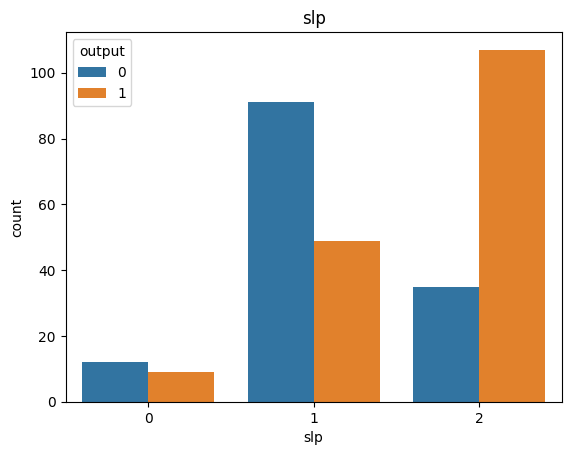

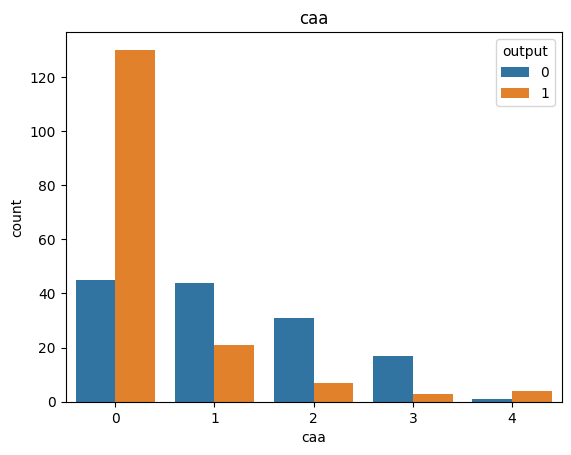

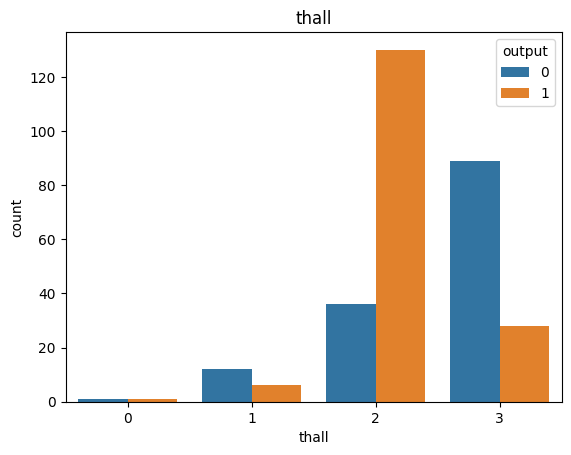

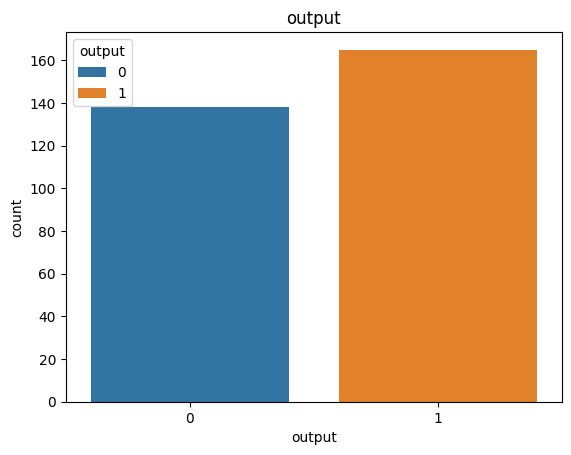

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

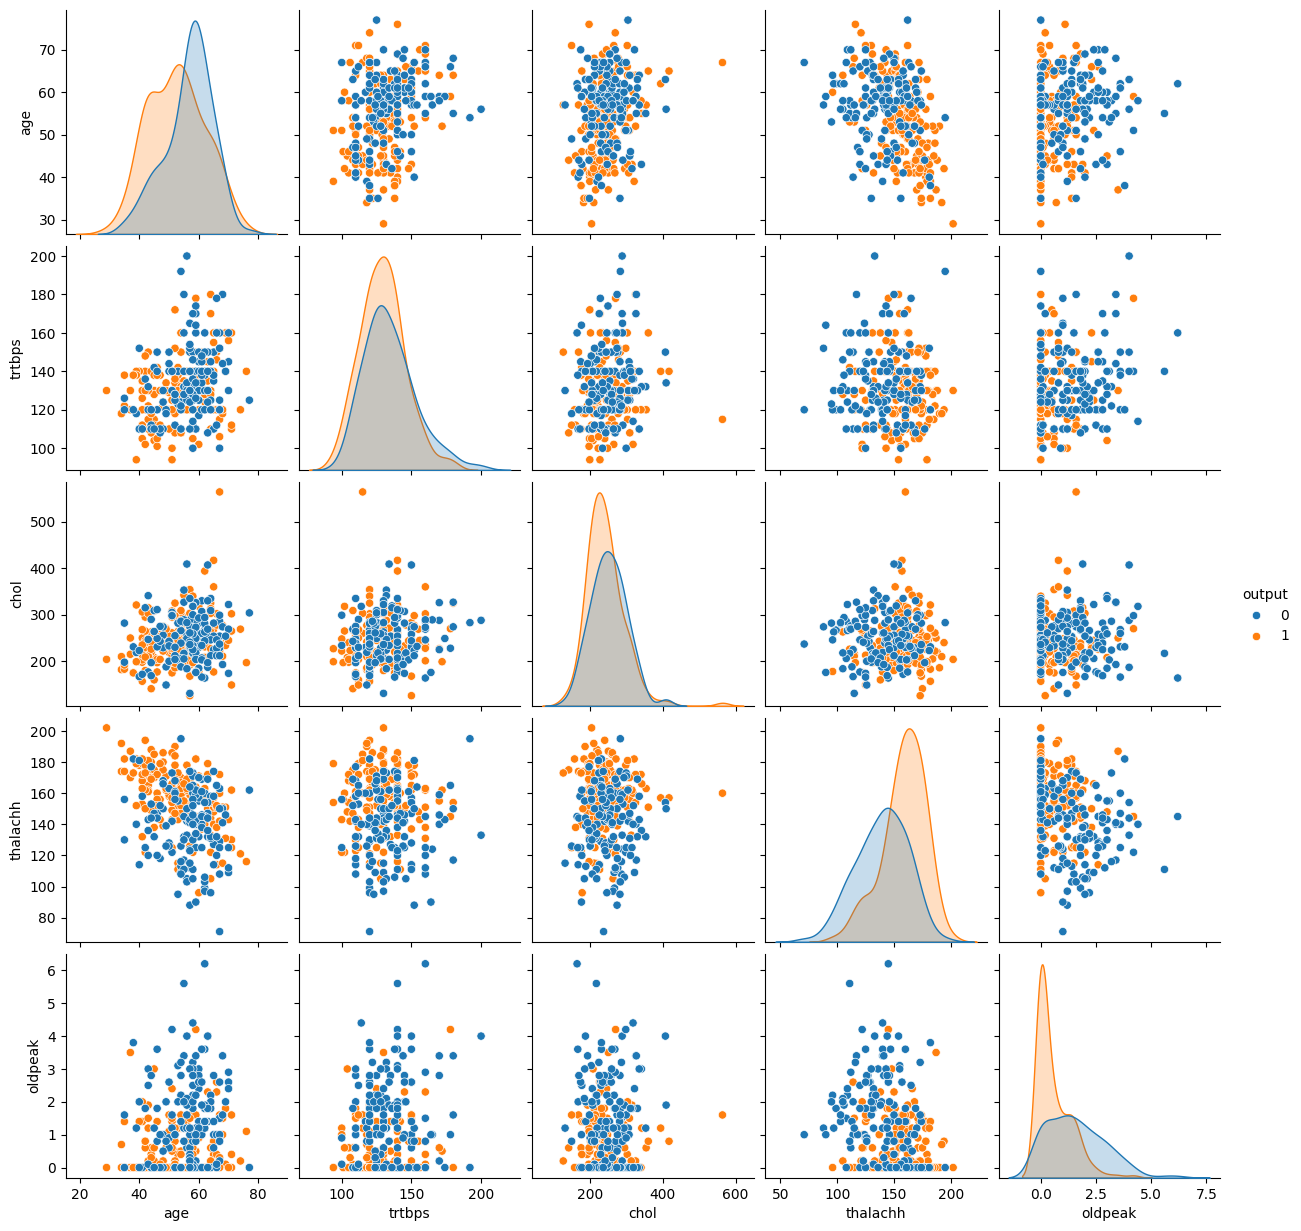

In [ ]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [ ]:

scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [ ]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [ ]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [ ]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [ ]:

data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


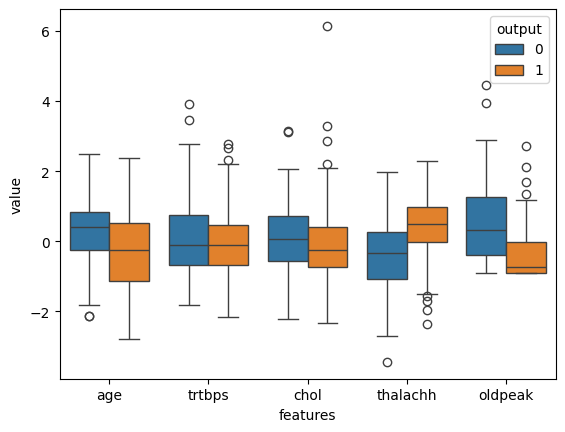

In [ ]:
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

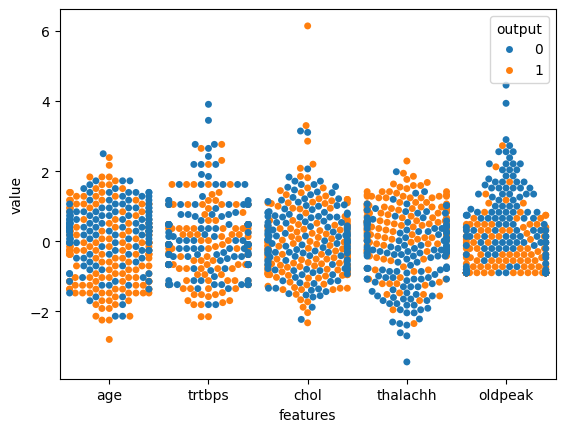

In [ ]:
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

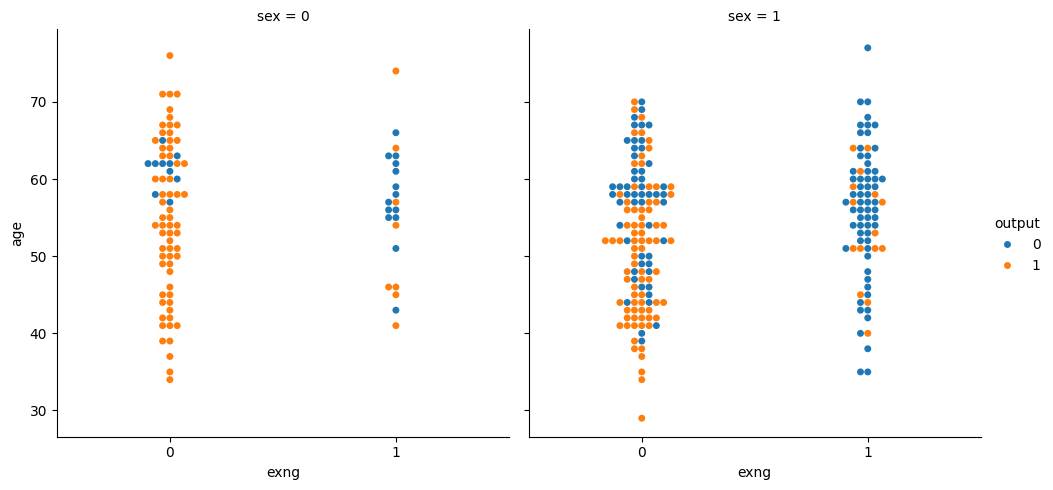

In [ ]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

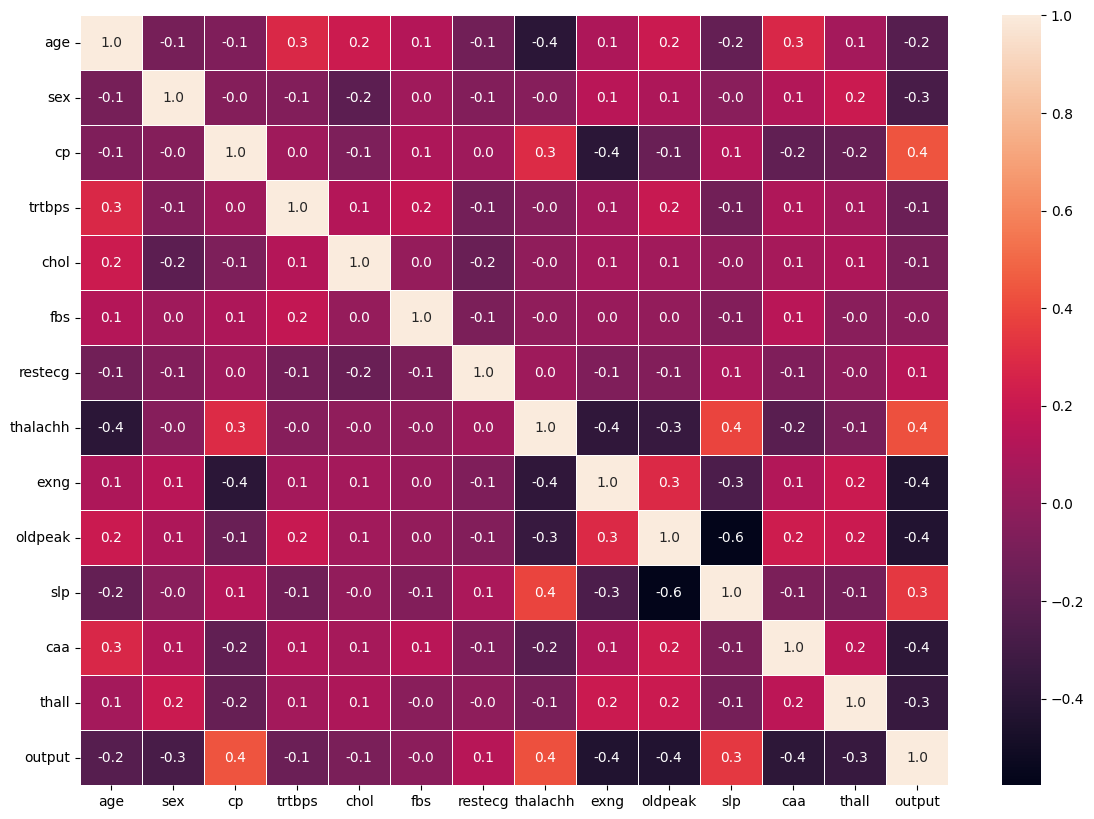

In [ ]:

plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
for i in numeric_list:


    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)

    IQR = Q3 - Q1

    print("Old shape: ", df.loc[:, i].shape)


    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))


    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))

    print("{} -- {}".format(upper, lower))

    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))

    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


In [ ]:
df1 = df.copy()

In [ ]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:

X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


In [ ]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.94268667, 0.05731333],
       [0.06997145, 0.93002855],
       [0.11282989, 0.88717011],
       [0.48063308, 0.51936692],
       [0.08770139, 0.91229861],
       [0.01943155, 0.98056845],
       [0.01314682, 0.98685318],
       [0.25649952, 0.74350048],
       [0.93057819, 0.06942181],
       [0.04667535, 0.95332465],
       [0.95754617, 0.04245383],
       [0.01122815, 0.98877185],
       [0.41901335, 0.58098665],
       [0.60411313, 0.39588687],
       [0.02729659, 0.97270341],
       [0.02614833, 0.97385167],
       [0.84042163, 0.15957837],
       [0.03595037, 0.96404963],
       [0.86160266, 0.13839734],
       [0.97611122, 0.02388878],
       [0.61984028, 0.38015972],
       [0.31186627, 0.68813373],
       [0.93464752, 0.06535248],
       [0.00474577, 0.99525423],
       [0.44456547, 0.55543453],
       [0.3387469 , 0.6612531 ],
       [0.03944728, 0.96055272],
       [0.99154986, 0.00845014],
       [0.46893753, 0.53106247],
       [0.69712671, 0.30287329]])

In [ ]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


In [ ]:

age = int(input("\n Enter age                                                      = "))
sex = int(input("\n Enter sex (1 for male, 0 for female)                           = "))
cp = int(input("\n Enter chest pain type (0-3)                                    = "))
trtbps = int(input("\n Enter resting blood pressure                                   = "))
chol = int(input("\n Enter cholesterol level                                        = "))
fbs = int(input("\n Enter fasting blood sugar (1 for > 120 mg/dl, 0 otherwise).    = "))
restecg = int(input("\n Enter resting electrocardiographic results (0-2)               = "))
thalachh = int(input("\n Enter maximum heart rate achieved                              = "))
exng = int(input("\n Enter exercise induced angina (1 for yes, 0 for no)            = "))
oldpeak = float(input("\n Enter ST depression induced by exercise relative to rest       = "))
slp = int(input("\n Enter the slope of the peak exercise ST segment (0-2)          = "))
caa = int(input("\n Enter number of major vessels (0-3)                            = "))
thall = int(input("\n Enter thalassemia value (0-3)                                  = "))
user_data = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trtbps': [trtbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalachh': [thalachh],
    'exng': [exng],
    'oldpeak': [oldpeak],
    'slp': [slp],
    'caa': [caa],
    'thall': [thall]
})
user_data = pd.get_dummies(user_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], drop_first=True)
missing_cols = set(X_train.columns) - set(user_data.columns)
for c in missing_cols:
  user_data[c] = 0
user_data = user_data[X_train.columns]
user_data[numeric_list[:-1]] = scaler.transform(user_data[numeric_list[:-1]])
prediction_probability = logreg.predict_proba(user_data)
heart_attack_probability = prediction_probability[0, 1]
print(f" The predicted probability of a heart attack is = {heart_attack_probability:.4f} \n This is a predicted value of computerized ML model with 90 % accuracy ! ! please seek professional advice for better assistance ")
print(" \n We are not responsible for your decissions ")